# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [59]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import cv2

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

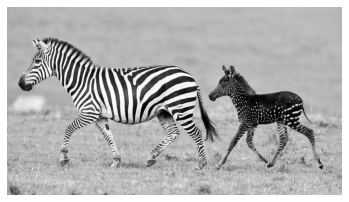

In [44]:
myimshow(zebra)

In [19]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [128]:
gabor = genGabor((64,64), 0.4, np.pi/90)

print(gabor)

[[2.83521048e-06 5.89318503e-06 1.00840828e-05 ... 5.47871898e-06
  1.20027444e-05 1.15470080e-05]
 [3.30282159e-06 6.81328607e-06 1.15875388e-05 ... 6.71665823e-06
  1.37761940e-05 1.30820965e-05]
 [3.83074318e-06 7.84343029e-06 1.32584604e-05 ... 8.14137342e-06
  1.57367655e-05 1.47568364e-05]
 ...
 [1.18411055e-05 1.65737042e-05 1.78917085e-05 ... 2.10793815e-05
  1.51057305e-05 8.99081321e-06]
 [1.06177238e-05 1.47568364e-05 1.57367655e-05 ... 1.86302280e-05
  1.32584604e-05 7.84343029e-06]
 [9.48017095e-06 1.30820965e-05 1.37761940e-05 ... 1.63943722e-05
  1.15875388e-05 6.81328607e-06]]


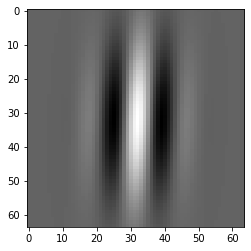

In [129]:
plt.imshow(gabor)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

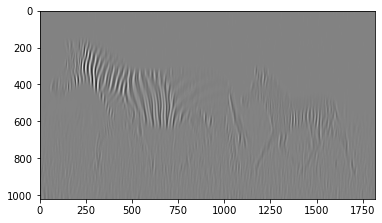

In [130]:
from scipy.ndimage import convolve

result_gabor = convolve(zebra, gabor)

plt.imshow(result_gabor)

(-0.5, 1813.5, 1019.5, -0.5)

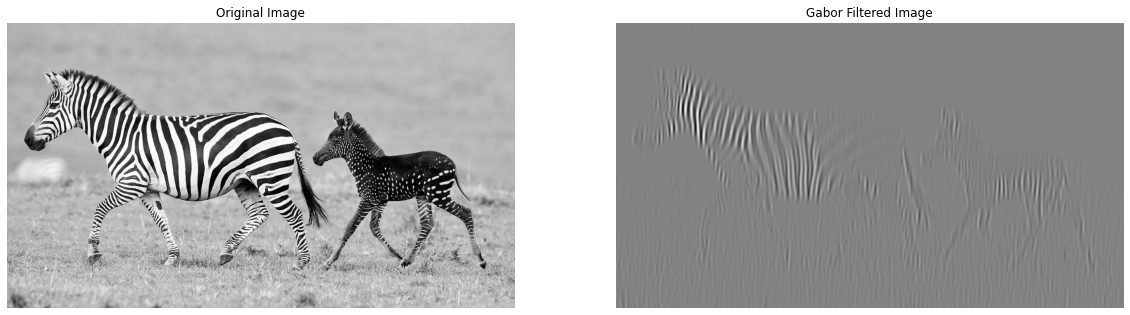

In [131]:
fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1, 2, 1) 
plt.imshow(zebra,cmap="gray")
plt.title('Original Image')
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(result_gabor,cmap="gray")
plt.title('Gabor Filtered Image')
plt.axis('off')

Il risultato è che il filtro sfoca tutto e mette in evidenza solo le righe delle due zebbre. In particolare per come sono stati settati i parametri evidenzia particolarmente le strisce verticali.

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce orizzontali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

(512, 512)


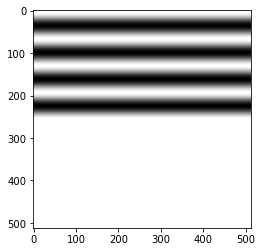

In [127]:
from matplotlib import image as mp_image

gabor_image = mp_image.imread('gabor1.jpg')

print(gabor_image.shape)
plt.imshow(gabor_image)

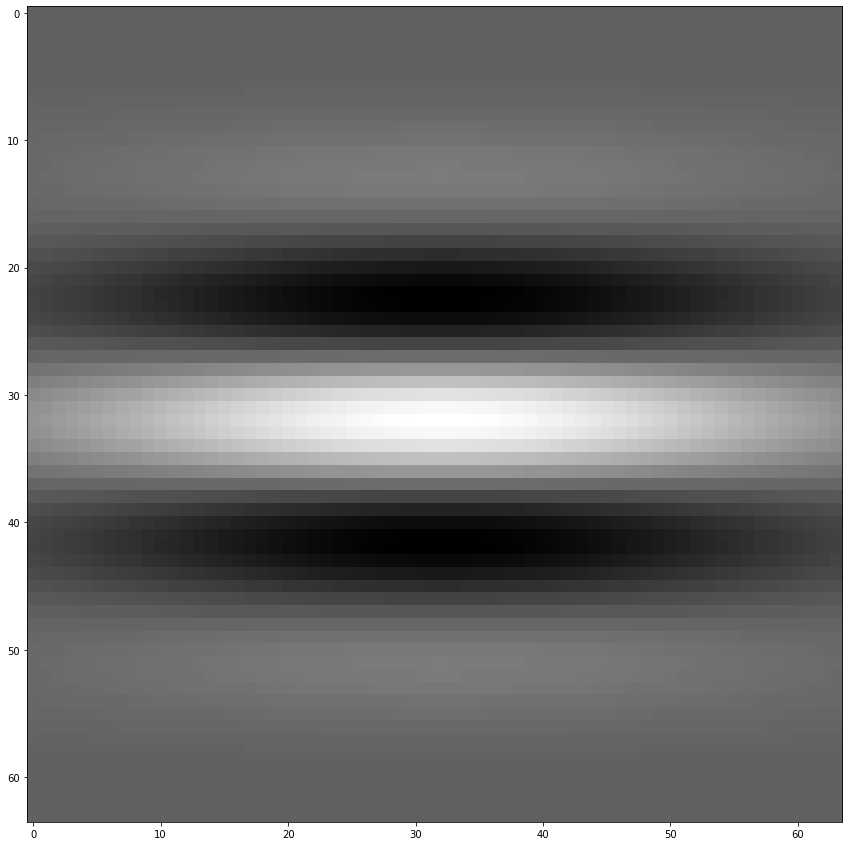

In [266]:
gabor_filter = genGabor((64,64), 0.3, np.pi/2)

plt.imshow(gabor_filter)

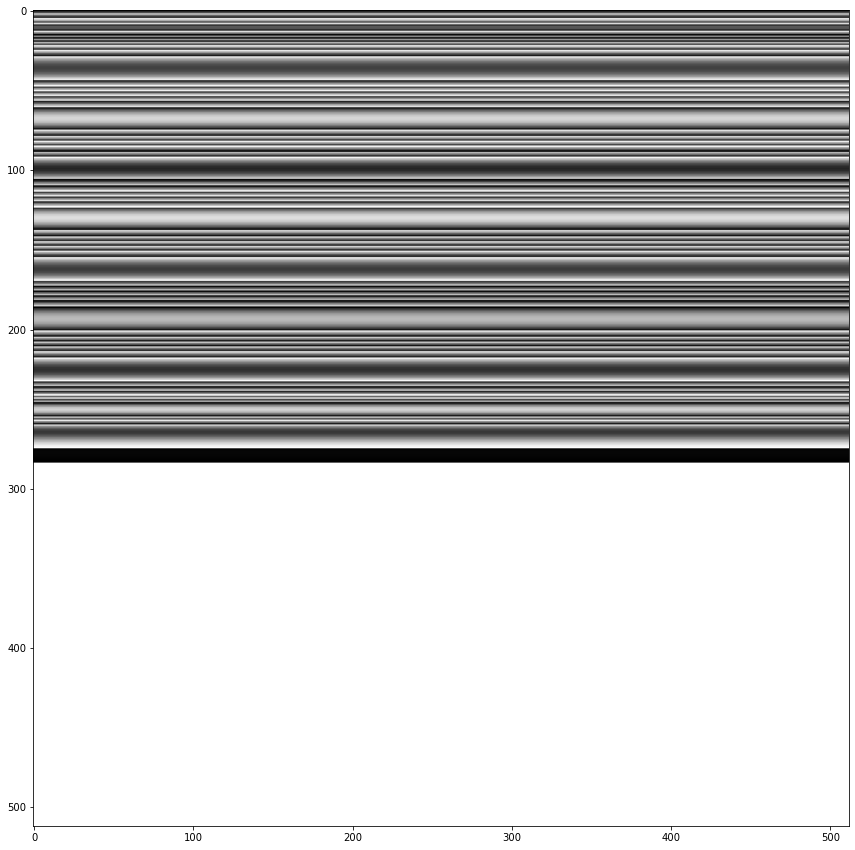

In [267]:
result_gabor_2 = convolve(gabor_image, gabor_filter)

plt.imshow(result_gabor_2)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

Per l'individuazione dei contorni si possono usare diversi tipi di filtri, in particolare abbiamo studiato i filtri di Sobel e il filtro Laplaciano. I filtri di Sobel sono una coppia di filtri che ci permettono di individuare righe orizzontali o verticali. Perciò per tale immagine la scelta migliore è applicare il filtro di Sobel che individui le linee orizzontali e questo è il filtro di Sobel seguente:

$$k = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} 
    $$
    
Per motivare la mia scelta applico tale filtro (fornito dalla libreria OpenCV) all'immagine 'gabor1.jpg:

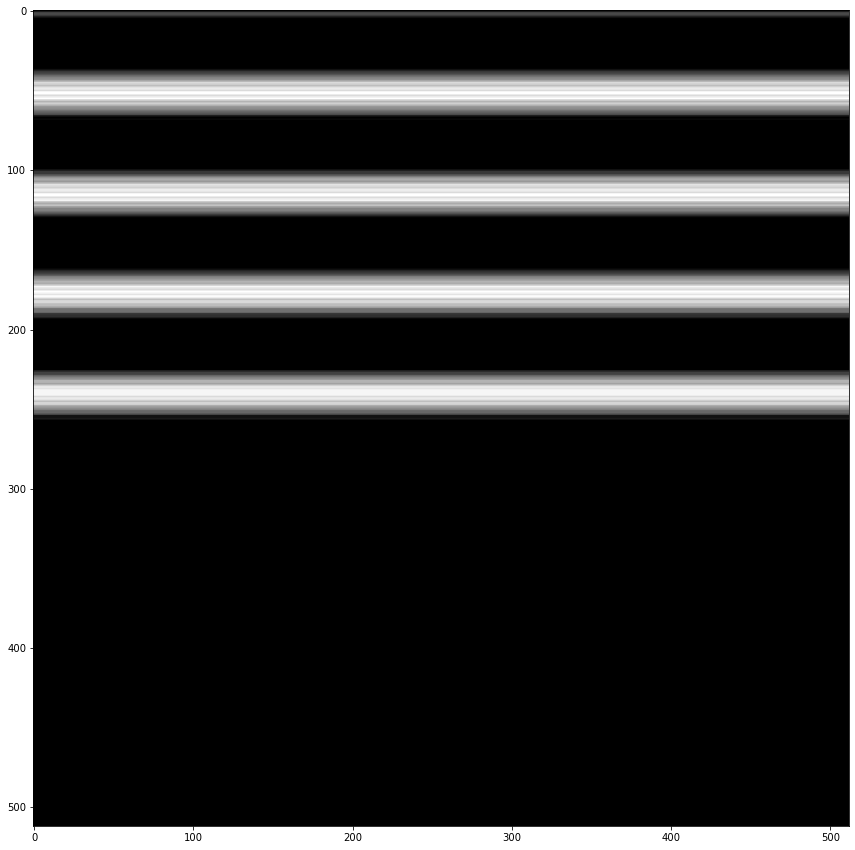

In [268]:
sobel = cv2.Sobel(gabor_image, -1, 0, 1)

plt.imshow(sobel, cmap='gray')

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

Il filtro utilizzato per ottenere questo risultato a partire dall'immagine 'ovali.jpg' è il filtro di Sobel verticale, dato dalla seguente matrice:


$$k = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} 
    = \begin{bmatrix} 1 \\ 0 \\-1\end{bmatrix} 
    \cdot\begin{bmatrix} 1 & 2 & -1\end{bmatrix} $$

Per dimostrarlo, parto dall'immagine originale e applicando tale filtro (in particolare quello fornito dalla libreria OpenCV) otteniamo il risultato desiderato.

In [ ]:
ovali = rgb2gray(imageio.imread('ovali.jpg'))

plt.imshow(ovali, cmap='gray')

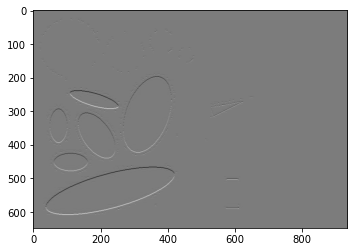

In [66]:
sobelV_filter = cv2.Sobel(ovali, -1, 0, 1)

plt.imshow(sobelV_filter, cmap='gray')

Ho ottenuto il risultato atteso.

# Esercizio 3

Scrivere un filtro 3x3 che restituisce un valore positivo se la media dei pixel rispetto all'asse orizzontale è inferiore al valore del centro, e negativo altrimenti. Cosa calcola tale filtro? Illustrarlo su un'immagine

In [255]:
img = zebra

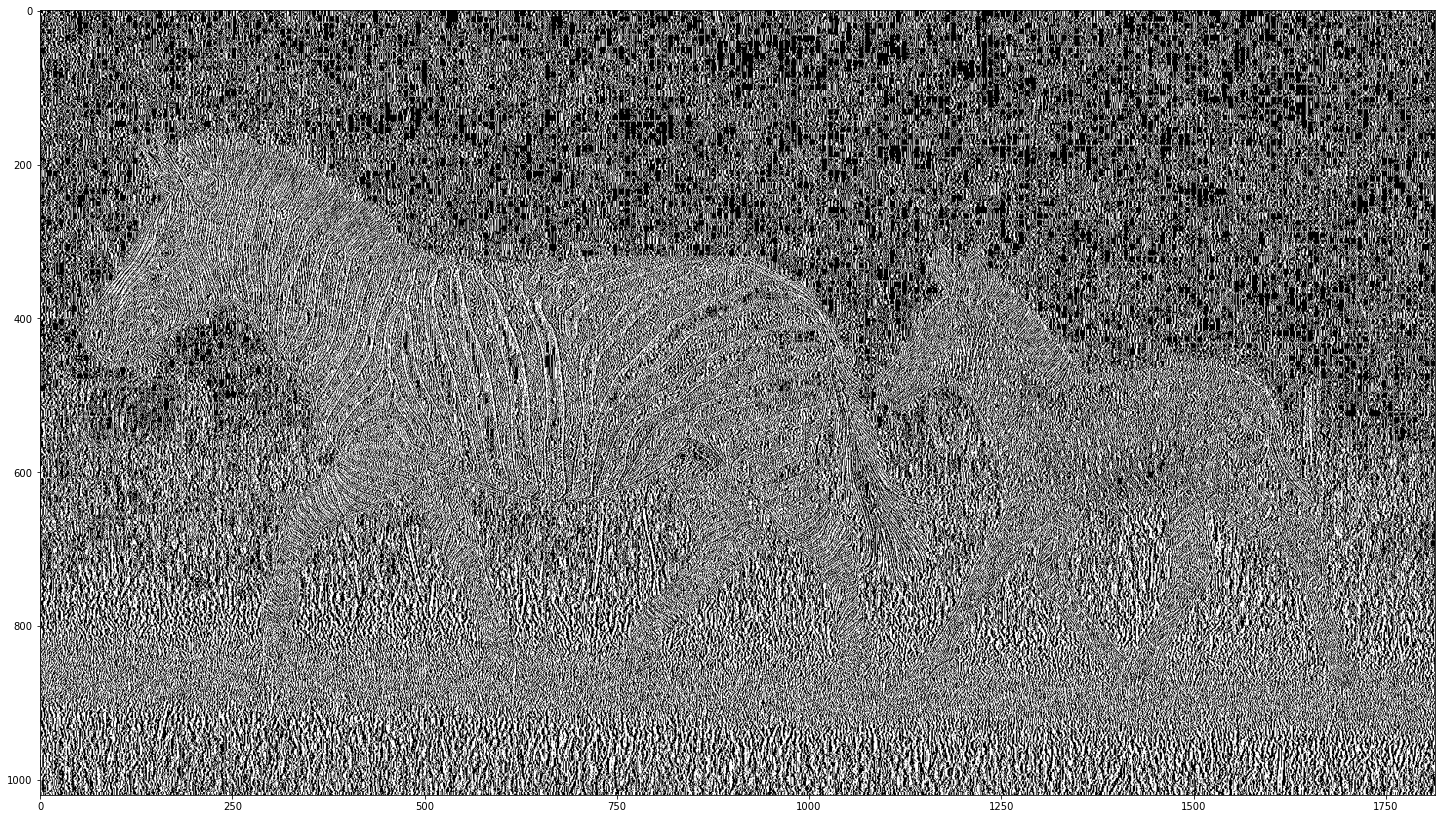

In [257]:
avg_filter = np.float32([[0,0,0],[1/3,1/3,1/3],[0,0,0]])
pos = 1
neg = -1
avg_img = convolve(img, avg_filter)
result = np.ones(img.shape)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if img[i, j] < avg_img[i, j]:
            result[i, j] = neg

plt.imshow(result)

Il filtro così creato, mette in evidenza le traslazioni verticali dell'immagine.

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

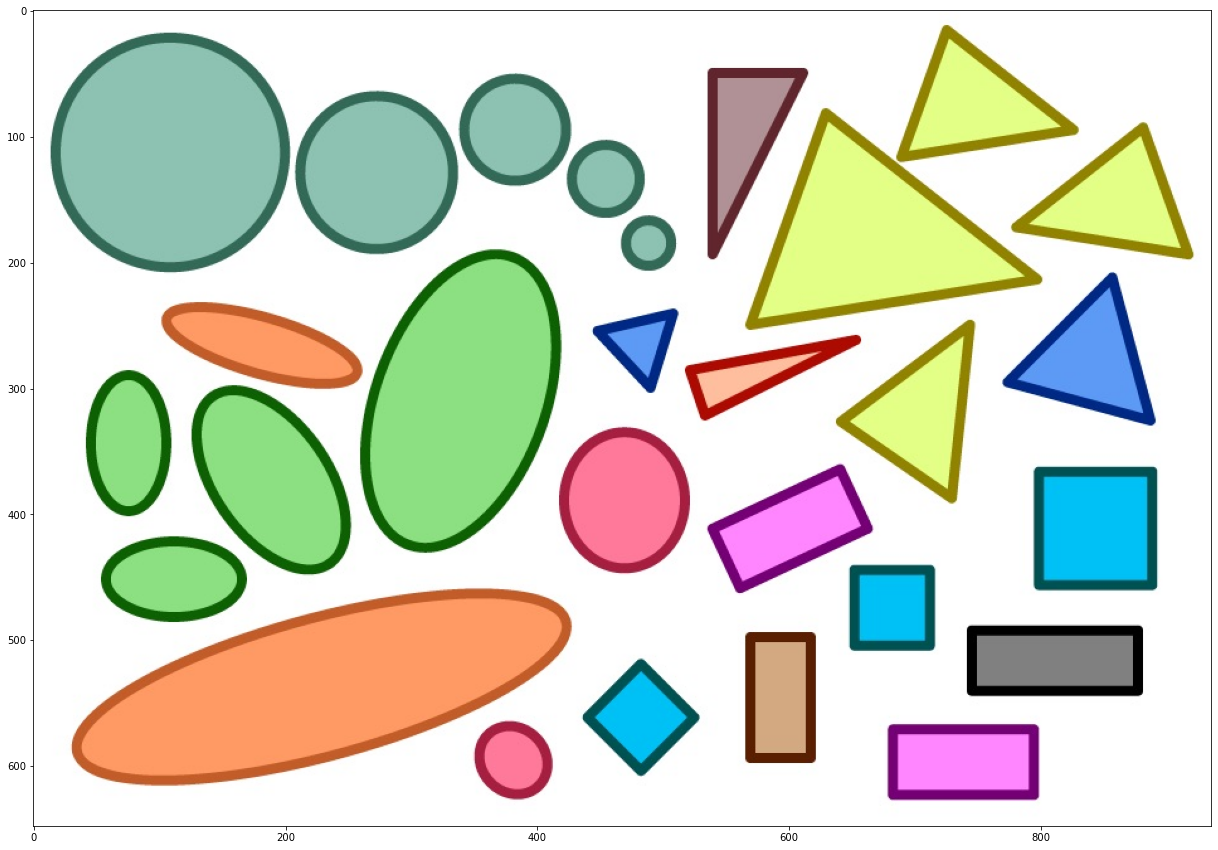

In [188]:
image = imageio.imread('forme.jpg')

gray_image = rgb2gray(image)

plt.imshow(image)

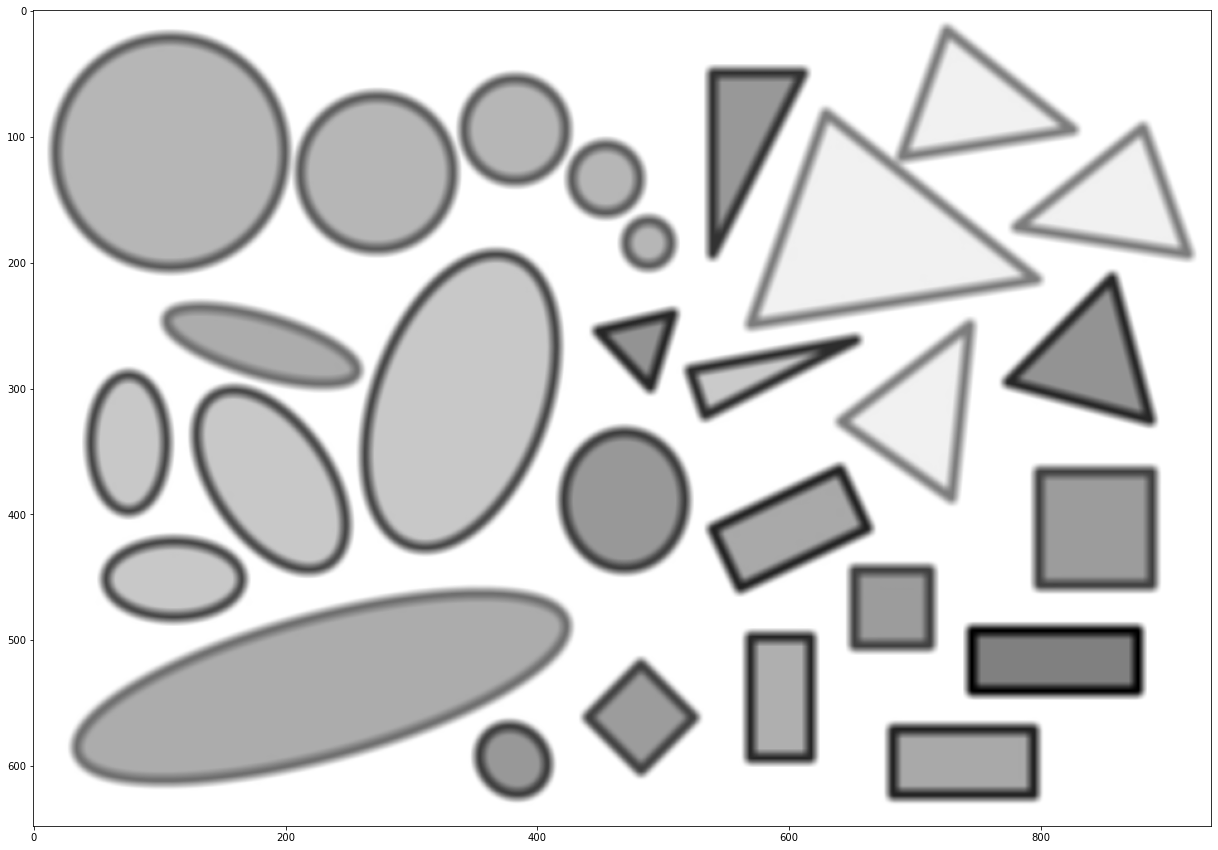

In [189]:
#per le operazioni che mi servono per la trasformata di Hough uso la versione in scala di grigio

blurred_img = cv2.GaussianBlur(gray_image, (7, 7), 5)

plt.imshow(blurred_img, cmap='gray')

In [190]:
print(blurred_img.dtype)

float64


In [191]:
#bisogna convertire l'immagine affinchè il suo dtype sia uint8
import skimage

blurred_img = skimage.img_as_ubyte(blurred_img)

print(blurred_img.dtype)

uint8


In [227]:
circles = cv2.HoughCircles(blurred_img, cv2.HOUGH_GRADIENT, 0.9, minDist=40, param1=140, param2=83, minRadius=20, maxRadius=100)
circles.shape

(1, 6, 3)

In [228]:
circles = np.uint16(np.around(circles))

circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]

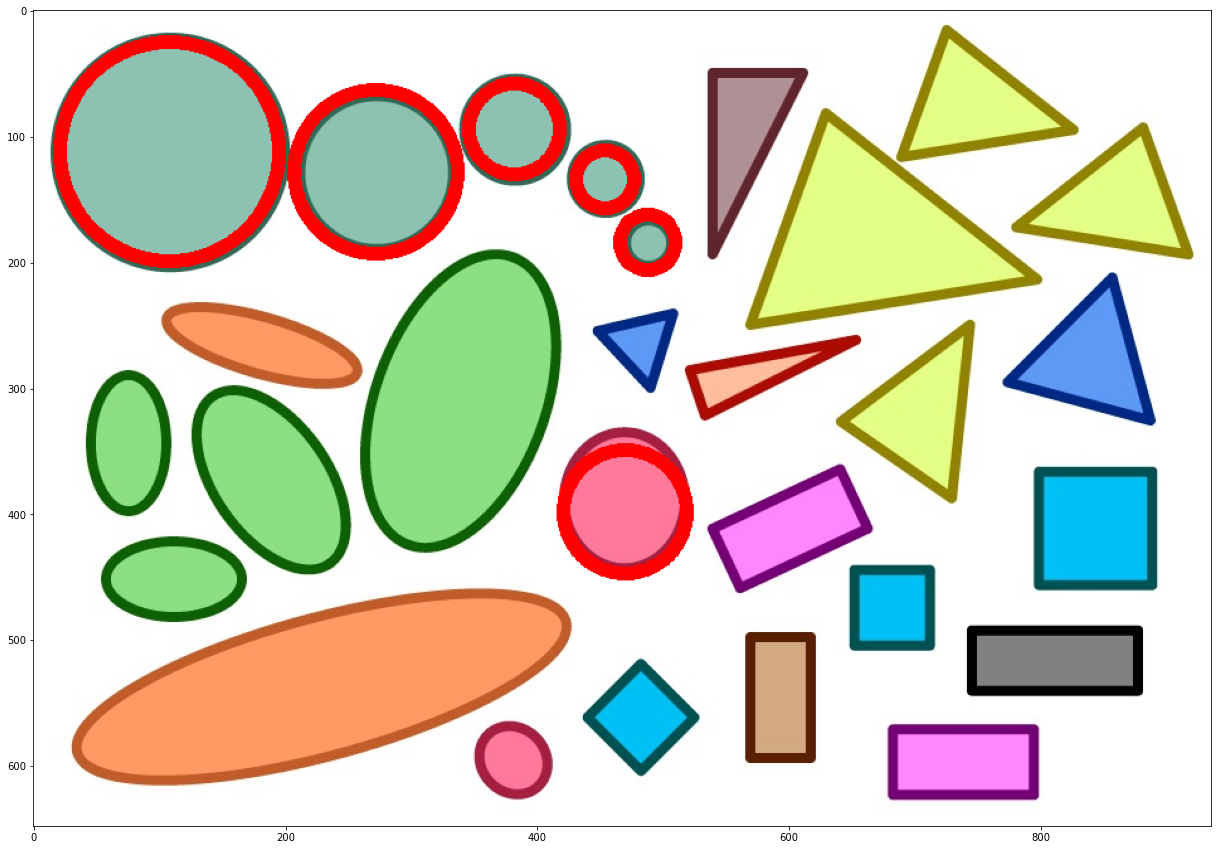

In [229]:
tmp = np.copy(image) 

for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]
    cv2.circle(tmp, c, r, (255,0,0), 10)
    
plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(tmp);

Tramite la trasformata di Hough ho individuato tutti i cerchi verdi ma in più anche un cerchio rosa, però analizzando le coordinate del centro riesco ad evitare di disegnare una x anche su quello.

In [230]:
print(circles) #la prime due colonne indicano le coordinate del centro, mentre l'ultima la size del raggio

[[108 112  87]
 [272 128  65]
 [382  94  36]
 [454 134  23]
 [470 398  49]
 [488 184  22]]


In [226]:
print(circles.shape)

(4, 3)


In [231]:
circles[4] = circles[5]
print(circles)

[[108 112  87]
 [272 128  65]
 [382  94  36]
 [454 134  23]
 [488 184  22]
 [488 184  22]]


In [232]:
circles = circles[0:5,:]
print(circles)

[[108 112  87]
 [272 128  65]
 [382  94  36]
 [454 134  23]
 [488 184  22]]


In [233]:
to_draw = image.copy()

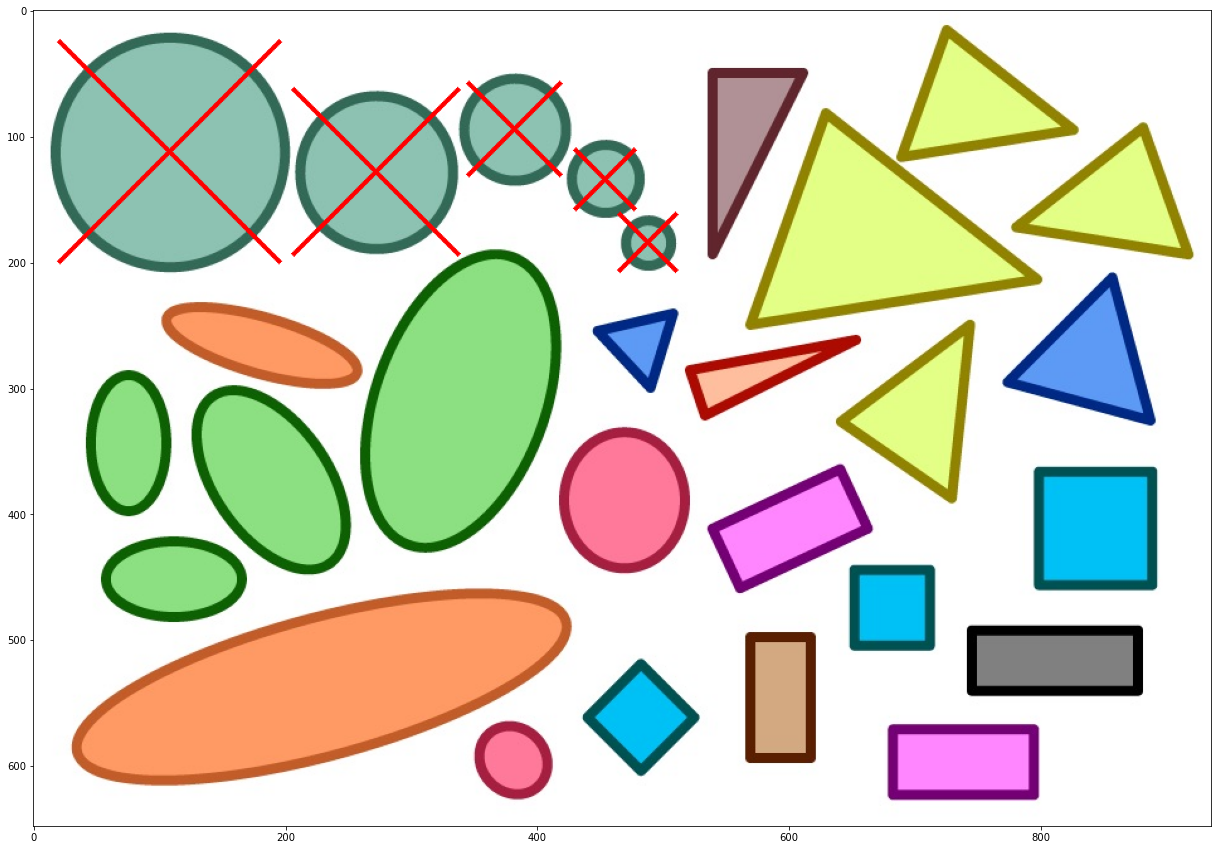

In [234]:
for i in range(circles.shape[0]):
    x = circles[i][0]
    y = circles[i][1]
    r = circles[i][2]
    cv2.line(to_draw, (x - r, y - r), (x + r, y + r), (255,0,0), 3)
    cv2.line(to_draw, (x + r, y - r), (x - r, y + r), (255,0,0), 3)
plt.imshow(to_draw)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

La matrice per effettuare la rotazione di 45 gradi serve applicare la seguente matrice:

$$
T=\left[
\begin{array}{ll}
  \mathit{cos}(\alpha) &   -\mathit{sin}(\alpha) \\
    \mathit{sin}(\alpha) &    \mathit{cos}(\alpha)  \\
\end{array}
\right]
$$

Però poichè bisogna anche traslare bisogna aggiungere un offset di 50px.

Applichiamo poi l'operazione *affine_transform* della libreria scipy.ndimage.

In [149]:
from scipy.ndimage import affine_transform

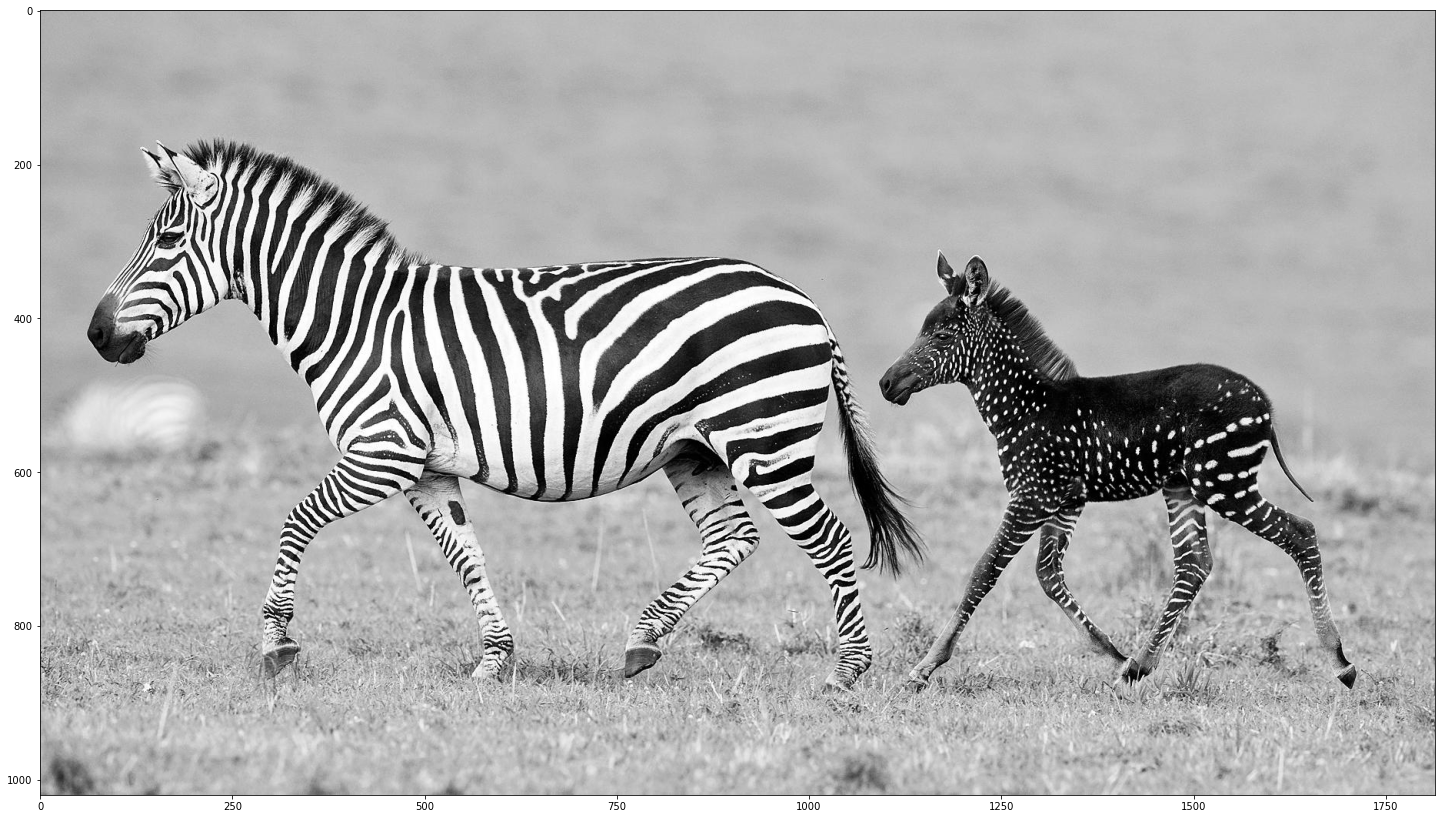

In [260]:
#uso l'immagine della zebra come esempio

plt.imshow(zebra)

In [261]:
alpha = np.pi/4
transform = np.array([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
print(transform)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Questa è la matrice che permette la rotazione, infatti se la applichiamo all'immagine si ottiene:

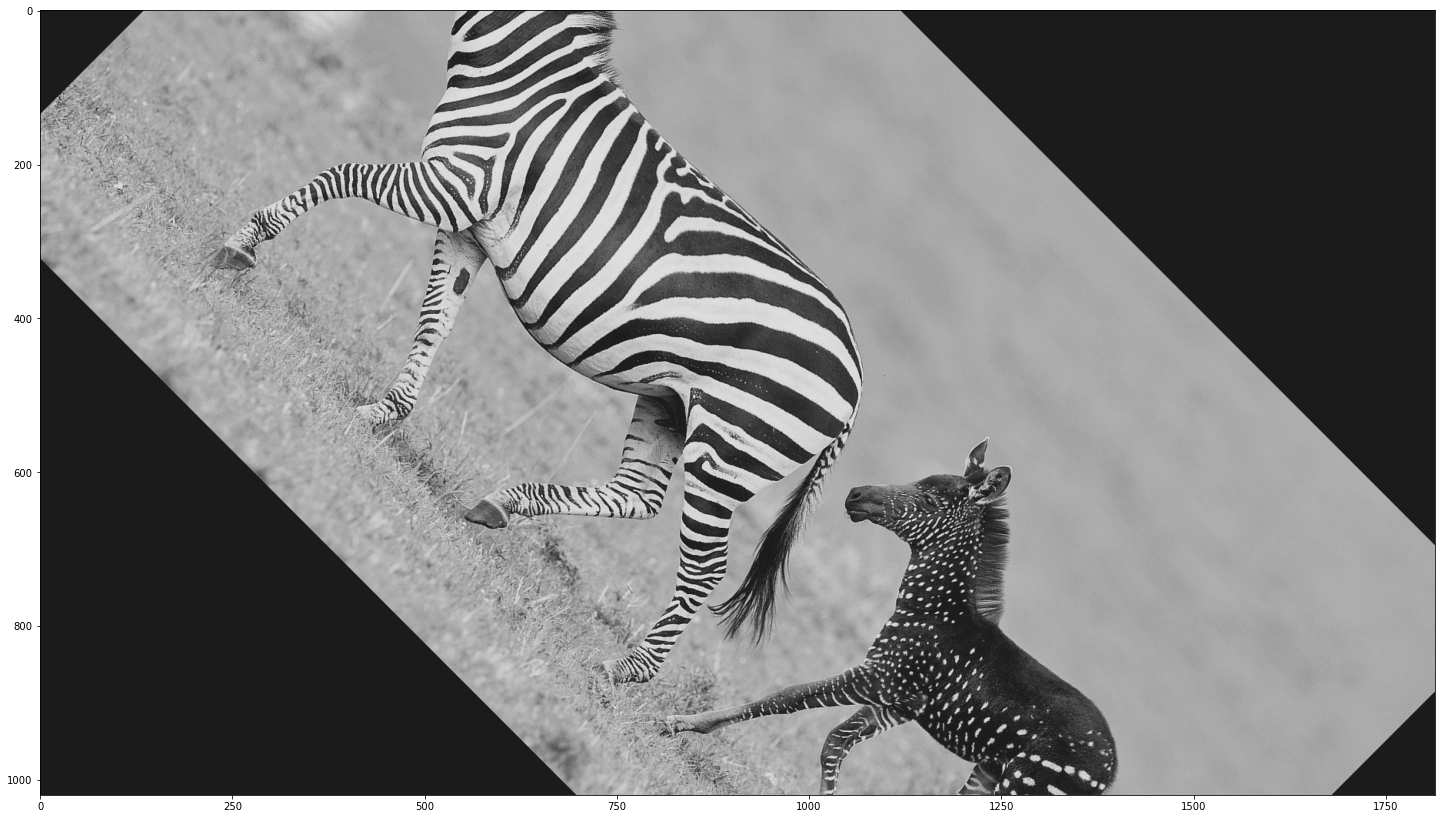

In [262]:
from scipy import linalg

center = 0.5*np.array(zebra.shape) + 50 #sommo 50 al centro per traslare il tutto
offset = (center-center.dot(transform)).dot(linalg.inv(transform))
dst = affine_transform(zebra,transform,order=2,offset=-offset)
plt.imshow(dst)